In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
file = pd.read_csv('transactions_dataset.csv', sep=';')

In [3]:
file = file.drop_duplicates()

In [4]:
file

date_order date_invoice  product_id  client_id   sales_net  \
0         2017-09-25   2017-09-25     2376333     188502   155.44320   
1         2017-09-25   2017-09-25     2520527     835089    16.39440   
2         2017-09-25   2017-09-25     2536756    1977896   365.76624   
3         2017-09-25   2017-09-25     3028673     598816     8.59878   
4         2017-09-25   2017-09-25      203377    2086861  1093.37400   
...              ...          ...         ...        ...         ...   
63319310  2019-06-10   2020-06-12     1596284     245272 -2056.91300   
63319311  2018-12-14   2020-07-15      908253     880496    27.62760   
63319312  2019-07-26   2020-10-29     1168247    2063314  -204.60984   
63319313  2018-05-23   2020-11-27     2319965    1287654    70.49730   
63319314  2019-09-10   2020-10-20      669067    1030337    -5.49240   

          quantity order_channel  branch_id  
0                3        online       2732  
1                3  at the store      10279  
2               21        online       6184  
3              201  at the store       4200  
4                3      by phone       7051  
...            ...           ...        ...  
63319310         5      by phone       7682  
63319311      1001      by phone       9375  
63319312       101      by phone       3014  
63319313        17      by phone       1015  
63319314         3  at the store       9136  

[61780198 rows x 8 columns]

# Sales per customer

<AxesSubplot:xlabel='client_id'>

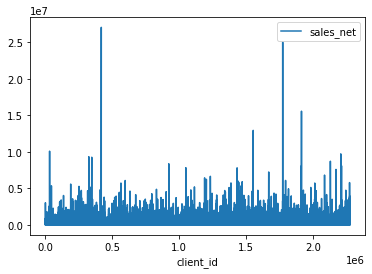

In [5]:
sales_per_customer = pd.pivot_table(file, values='sales_net', index=['client_id'],  aggfunc='sum')

sales_per_customer.plot()

# Sales per item

<AxesSubplot:xlabel='product_id'>

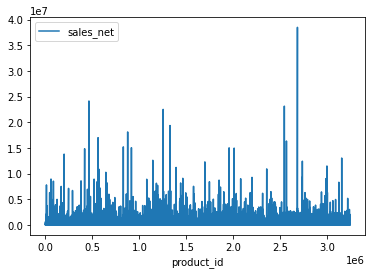

In [6]:
sales_per_item = pd.pivot_table(file, values='sales_net', index=['product_id'],  aggfunc='sum')

sales_per_item.plot()

# Ft creation

In [7]:
file['date_order'] = pd.to_datetime(file['date_order'])
file['date_invoice'] = pd.to_datetime(file['date_invoice'])
file['price'] = file['sales_net'] / file['quantity']
file['year'] = file.date_order.apply(lambda x: x.year)
file['month'] = file.date_order.apply(lambda x: x.month)
file['day'] = file.date_order.apply(lambda x: x.day)

In [8]:
def get_season(y):
    if (y < 3) or (y == 12):
        return 'Winter' 
    elif (y >= 3) and (y <= 5):
        return 'Spring'
    elif (y >= 6) and (y <= 8):
        return 'Summer'
    elif (y >= 9) and (y <= 11) :
        return 'Fall'

In [9]:
file['season'] = file['month'].apply(get_season)

In [10]:
file['season'] = file.season.astype('category')

# Sales per month & percentage change per month

<AxesSubplot:xlabel='year,month'>

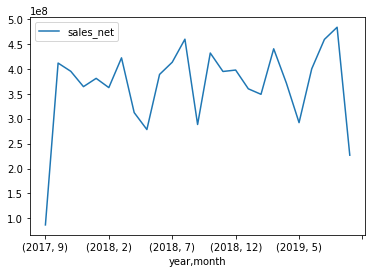

In [11]:
sales_per_month = pd.pivot_table(file, values='sales_net', index=['year','month'],  aggfunc='sum')

sales_per_month.plot()

In [12]:
sales_per_month = pd.pivot_table(file, values='sales_net', index=['year','month'],  aggfunc='sum')

sales_per_month.pct_change()

sales_net
year month           
2017 9            NaN
     10      3.737769
     11     -0.040160
     12     -0.077886
2018 1       0.045607
     2      -0.048637
     3       0.164709
     4      -0.260254
     5      -0.108837
     6       0.397307
     7       0.062995
     8       0.111827
     9      -0.372423
     10      0.497185
     11     -0.085758
     12      0.007238
2019 1      -0.094659
     2      -0.030646
     3       0.261728
     4      -0.156285
     5      -0.213595
     6       0.369637
     7       0.147506
     8       0.053133
     9      -0.530979

<AxesSubplot:xlabel='year,month'>

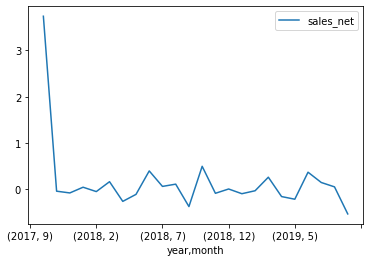

In [13]:
sales_per_month.pct_change().plot()

# Sales per Year

<AxesSubplot:xlabel='year'>

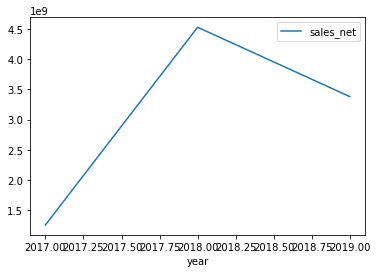

In [14]:
sales_per_year = pd.pivot_table(file, values='sales_net', index=['year'],  aggfunc='sum')

sales_per_year.plot()

# Sales per season

<AxesSubplot:xlabel='season'>

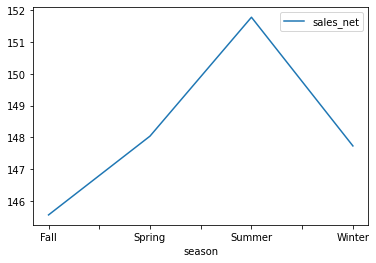

In [15]:
sales_per_season = pd.pivot_table(file, values='sales_net', index=['season'],  aggfunc='mean')

sales_per_season.plot()

# Most used order channel per customer 

In [16]:
file['order_channel'].unique()

array(['online', 'at the store', 'by phone',
       'during the visit of a sales rep', 'other'], dtype=object)

In [17]:
def channel_encoder(y):
    if y == 'online':
        return 0 
    elif y == 'at the store':
        return 1
    elif y == 'by phone':
        return 2
    elif y == 'during the visit of a sales rep':
        return 3
    else:
        return 4

In [18]:
file['order_channel_encoded'] = file['order_channel'].apply(channel_encoder)

In [19]:
most_used_channel_per_customer = pd.pivot_table(file, values='order_channel_encoded', index=['client_id'], aggfunc=lambda x: x.mode().iat[0])

most_used_channel_per_customer.value_counts()

order_channel_encoded
1                        106774
2                         57884
0                          5512
4                           318
3                           101
dtype: int64

# Negative sales analysis

In [20]:
neg_sales = file[file['sales_net']<0]
neg_sales

date_order date_invoice  product_id  client_id    sales_net  \
129      2017-09-26   2017-09-26      121848    1789606  -182.792500   
219      2017-09-26   2017-09-26     1435071    1791722  -169.456272   
621      2017-09-25   2017-09-27      693904    2167021   -36.901200   
936      2017-09-25   2017-09-26      133038     480303   -64.446000   
1054     2017-09-25   2017-09-26      235896    1324117  -180.113000   
...             ...          ...         ...        ...          ...   
63319308 2019-06-11   2020-06-09      293157     826473  -123.951600   
63319309 2019-08-30   2020-06-11     1793357    2180864   -16.698000   
63319310 2019-06-10   2020-06-12     1596284     245272 -2056.913000   
63319312 2019-07-26   2020-10-29     1168247    2063314  -204.609840   
63319314 2019-09-10   2020-10-20      669067    1030337    -5.492400   

          quantity order_channel  branch_id       price  year  month  day  \
129             25  at the store       5395   -7.311700  2017      9   26   
219             51  at the store       5167   -3.322672  2017      9   26   
621              3        online       6184  -12.300400  2017      9   25   
936              5  at the store        210  -12.889200  2017      9   25   
1054             5      by phone      10449  -36.022600  2017      9   25   
...            ...           ...        ...         ...   ...    ...  ...   
63319308         3  at the store       2429  -41.317200  2019      6   11   
63319309         3      by phone       8159   -5.566000  2019      8   30   
63319310         5      by phone       7682 -411.382600  2019      6   10   
63319312       101      by phone       3014   -2.025840  2019      7   26   
63319314         3  at the store       9136   -1.830800  2019      9   10   

          season  order_channel_encoded  
129         Fall                      1  
219         Fall                      1  
621         Fall                      0  
936         Fall                      1  
1054        Fall                      2  
...          ...                    ...  
63319308  Summer                      1  
63319309  Summer                      2  
63319310  Summer                      2  
63319312  Summer                      2  
63319314    Fall                      1  

[2332804 rows x 14 columns]

In [21]:
most_used_channel_per_customer_neg = pd.pivot_table(neg_sales, values='order_channel_encoded', index=['client_id'], aggfunc=lambda x: x.mode().iat[0])

most_used_channel_per_customer_neg.value_counts()

order_channel_encoded
1                        52474
2                        42214
0                         2629
4                          165
3                           74
dtype: int64

<AxesSubplot:xlabel='year,month'>

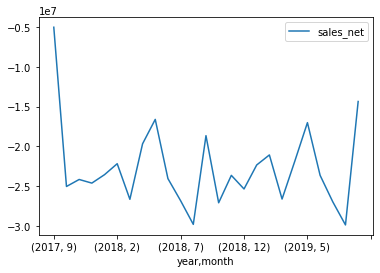

In [22]:
neg_sales_per_month = pd.pivot_table(neg_sales, values='sales_net', index=['year','month'],  aggfunc='sum')

neg_sales_per_month.plot()

<AxesSubplot:xlabel='month,day'>

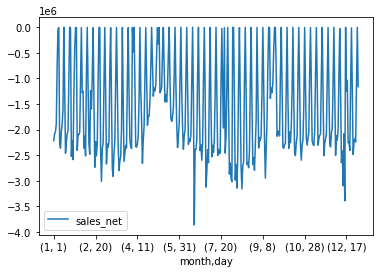

In [23]:
neg_sales_per_day = pd.pivot_table(neg_sales, values='sales_net', index=['month','day'],  aggfunc='sum')

neg_sales_per_day.plot()

In [24]:
import pandas_profiling

In [25]:
pandas_profiling.ProfileReport(neg_sales)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]